# Radio Morphen Ratropia 
A colectiuon of python tools for radio astronomy image analysis. <br>
By Geferson Lucatelli

Objectives:
1. Caracterize the radio emission of Local U/LIRGs.
2. Disentangle the radio sub-components on these structures, e.g. compact components, diffuse emission
3. Break down the total luminosity contribution coming from the diffuse radio emission in relation to the compact/AGN emission


Basically, this notebook contains:

    1. Image fitting implementations
    2. Image analysis (non-parametric)
    3. Plotting capabilities
    4. Signal processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import casatasks
from casatasks import *
import casatools
import casaviewer
import casaplotms
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as pf
from matplotlib.gridspec import GridSpec
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from casaviewer import imview as imview

def reset_rc_params():
    mpl.rcParams.update({'font.size': 16, 
                         "text.usetex": False,#         
                         "font.family": "sans-serif",
                         'mathtext.fontset': 'stix',
                         "font.family": "sans",
                         'font.weight': 'medium', #medium, semibold, light, 500
                         'font.family': 'STIXGeneral',
                         'xtick.labelsize':16,
                         'figure.figsize': (6,4),
                         'ytick.labelsize':16,
                         'axes.labelsize' : 16,
                         'xtick.major.width':1,
                         'ytick.major.width':1,
                         'axes.linewidth':1.5,
                         'axes.edgecolor':'black',
                         'lines.linewidth':2,
                         'legend.fontsize':14,
                         'grid.linestyle':'--',
                         'axes.grid.which': 'major',  # set the grid to appear only on major ticks
                         'axes.grid.axis': 'both',  # set the grid to appear on both the x and y axis
                          'axes.spines.right': False,  
                         'axes.grid': True,
        })
    pass
reset_rc_params()


# Import external libraries
import sys
# sys.path.append('../../scripts/analysis_scripts/')
sys.path.append('analysis_scripts/')
sys.path.append('../libs/')
sys.path.append('/opt/casa-6.5.1-23-py3.8/')
import analysisUtils as au
from analysisUtils import *
from libs import *

from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.patches import Circle


Loading separate utilities in CASA
You appear to be importing analysisUtils into python (not CASA). version =  3.8.16
CASAPATH is not defined, so I am skipping a lot of imports
Loading separate utilities in CASA

                                                          ..___|**_
                                                  .|||||||||*+@+*__*++.
                                              _||||.           .*+;].,#_
                                         _|||*_                _    .@@@#@.
                                   _|||||_               .@##@#| _||_
   Radio Morphen              |****_                   .@.,/\..@_.
                             #///#+++*|    .       .@@@;#.,.\@.
                              .||__|**|||||*||*+@#];_.  ;,;_
 Geferson Lucatelli                            +\*_.__|**#
                                              |..      .]]
                                               ;@       @.*.
                                                #|       

# 2. Manipulating Dada
## 2.1 Reading Imaging Data

In [2]:
root_path  = '/home/sagauga/pCloudDrive/PhD/'

In [3]:
imagelist,residuallist = get_list_names(root_path=root_path,
                        prefix='*-MFS-image.cutout_north.fits',
                        which_data='combined_data',
                        source='VV705_C',version='v2',
                        # sub_comp='_north',
                        cutout_folder='cutouts/')
# imagelist_sort,residuallist_sort=sort_list_by_beam_size(imagelist[1::2],residuallist[1::2])
imagelist,residuallist=sort_list_by_beam_size(imagelist,residuallist)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 55.55it/s]

0 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-1.0-MFS-image.cutout_north.fits
1 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.8-MFS-image.cutout_north.fits
2 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.7-MFS-image.cutout_north.fits
3 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.6-MFS-image.cutout_north.fits
4 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.5-MFS-image.cutout_north.fits
5 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.4-MFS-image.cutout_north.fits
6 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.3-MFS-image.cutout_north.fits
7 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.2-MFS-image.cutout_north.fits
8 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.1-MF

For general use, I have create a function `ctn`, means, casa to numpy. It just reads fits files, even those cases that astropy wont work at first glance. 

In [4]:
ctn??

In [5]:
idx = -1

image_data = ctn(imagelist[idx])
print(image_data)

[[-1.09354937e-06 -2.00575997e-07  7.20026208e-07 ...  1.53438702e-06
   6.80672485e-07  4.21242106e-07]
 [-7.61272133e-07 -1.67356227e-08  8.68041809e-07 ...  6.97526559e-07
  -6.36513064e-10  2.88818399e-07]
 [-5.25996739e-08  4.01952974e-07  1.00060174e-06 ...  7.13818679e-07
   1.35962736e-07  7.43773285e-07]
 ...
 [ 5.59951877e-06  4.95547010e-06  4.33327932e-06 ...  4.06310346e-06
   4.32096704e-06  3.99843611e-06]
 [ 6.04574188e-06  5.37961751e-06  4.68820963e-06 ...  2.87034482e-06
   2.76534092e-06  2.25250369e-06]
 [ 5.94320727e-06  5.21023776e-06  4.41957900e-06 ...  1.65015945e-06
   1.25571978e-06  7.36275979e-07]]


## 2.3 Quick look to the data

Quick check of the image(s).

`eimshow` is a wraper for plt.imshow, means enhanced-imshow, designed to be customized and fast. Default arguments works well.

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender


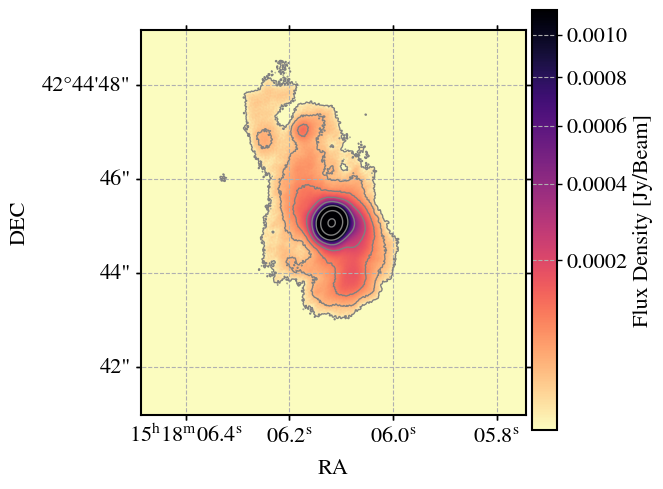

In [6]:
ax=eimshow(imagelist[idx],
        vmin_factor=3.0,vmax_factor=0.19, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',
       )

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender


/home/sagauga/miniconda3/envs/numba/lib/python3.8/site-packages/numpy/core/function_base.py:424: RuntimeWarning: invalid value encountered in log10
  log_stop = _nx.log10(stop)
/home/sagauga/miniconda3/envs/numba/lib/python3.8/site-packages/numpy/core/function_base.py:423: RuntimeWarning: invalid value encountered in log10
  log_start = _nx.log10(start)


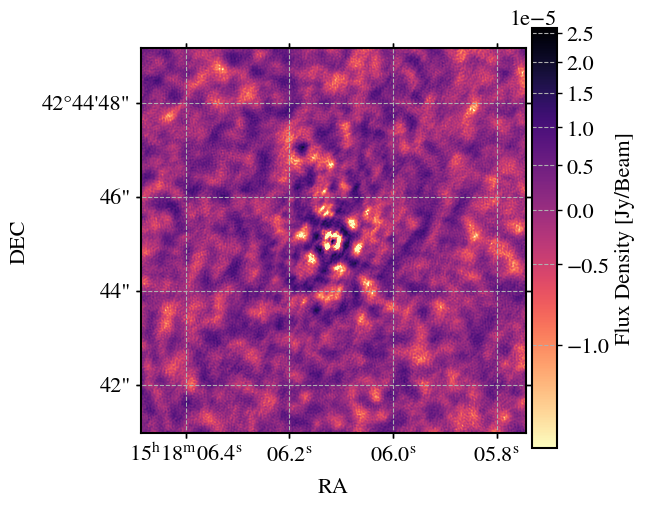

In [7]:
ax=eimshow(residuallist[idx],
        vmin_factor=-3.0,vmax_factor=0.99, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([0]), # negative contours to draw -- which std level?
        CM='magma_r',add_contours=False # remove contours
       )

Want to zoom-in in the image? 

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender
  >> Center -->  [508 510   0   0]


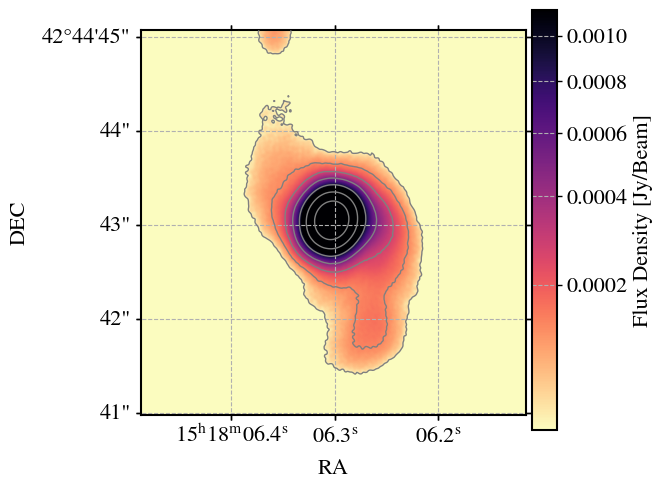

In [8]:
ax=eimshow(imagelist[idx],
        vmin_factor=3.0,vmax_factor=0.19, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',crop=True,box_size=256
       )

If the zoom-in is not computing the rms value, you can provide it:

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender
  >> Center -->  [508 510   0   0]


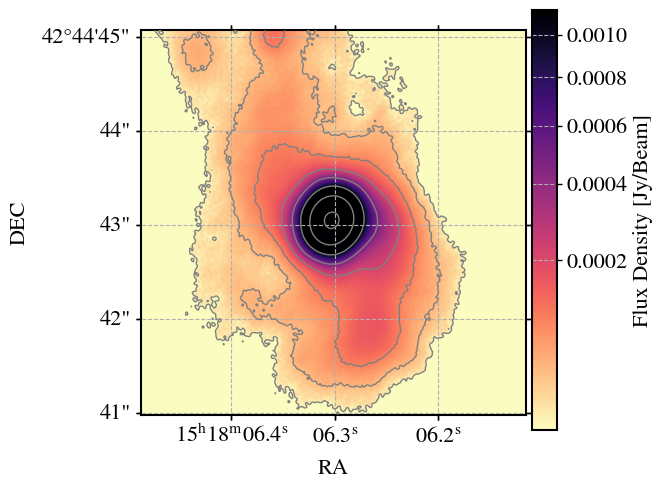

In [9]:
rms = mad_std(image_data)
ax=eimshow(imagelist[idx],rms=rms,
        vmin_factor=3.0,vmax_factor=0.19, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',crop=True,box_size=256
       )

## 2.2 Basic Image Analysis

The default option of the following functions is to receive the imagefile as actually the filename, not the data it contains. Why? Because radio astronomy requires constantly reading information from the image header. 
You can provide as input a numpy array using the `data_2D` option, but you MUST provide the file name from which that data comes from. 

In [10]:
imagename = imagelist[idx]

Mad    >   6.430414371954692e-06
std    >   0.0002351733760317209
median >   2.9460694577210234e-06
mean   >   3.0223418070818113e-05
0.012485075362785187
2.4692221433038586e-05
0.01328874373316902
Low Flux (extended) Jy                    >  0.0009323609064362313  >> ratio= 0.07469028887762018
Mid Flux (outer core + inner extended) Jy >  0.0031458894621498954  >> ratio= 0.2520133470665926
Inner Flux (core) Jy                      >  0.007755642248624399  >> ratio= 0.6212949899362294
Uncertain Flux (<5std)                    >  0.0006491345667370679  >> ratio= 0.052001374119557714
Total Flux Jy                             >  0.012483027183947594
Total area (in # ob beams)                >  65.0898535137941
Total inner area (in # ob beams)          >  3.651395321738329
Total mid area (in # ob beams)            >  20.9426894056294
Total low area (in # ob beams)            >  20.06045057272432
Total uncertain area (in # ob beams)      >  28.04924061288953
Inner Flux (core) fraction       

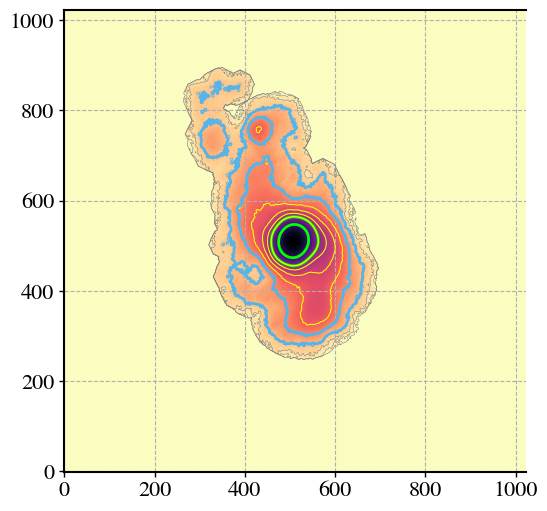

In [11]:
dict_results = plot_values_std(img=imagename, cell_size=None,crop=False,apply_mask=True,
                                 results=None,SAVE=True, ext='.jpg',show_figure=True)


In [12]:
dict_results

{'#imagename': 'clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_north.fits',
 'total_flux': 0.012483027183947594,
 'inner_flux': 0.007755642248624399,
 'low_flux': 0.0009323609064362313,
 'mid_flux': 0.0031458894621498954,
 'uncertain_flux': 0.0006491345667370679,
 'inner_flux_f': 0.6212949899362294,
 'low_flux_f': 0.07469028887762018,
 'mid_flux_f': 0.2520133470665926,
 'uncertain_flux_f': 0.052001374119557714,
 'number_of_beams': 65.0898535137941,
 'n_beams_inner': 3.651395321738329,
 'n_beams_mid': 20.9426894056294,
 'n_beams_low': 20.06045057272432,
 'n_beams_uncertain': 28.04924061288953}

5.999


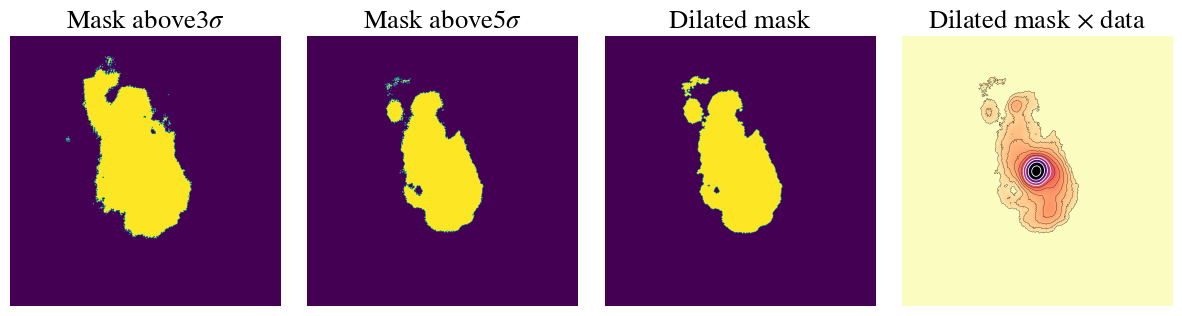

Inner Perimeter (%50): 234.20536384014667
Outer Perimeter (%90): 1401.765267816148
Outer Perimeter (%99): 2775.812723953946


ModuleNotFoundError: No module named 'fitEllipse2018'

In [13]:
residualname = residuallist[idx]
cell_size = get_cell_size(imagelist[idx]) # for safety reasons
levels, fluxes, agrow, plt, \
    omask, mask, results_final = make_flux_vs_std(imagename,cell_size=cell_size,
                                                  residual=residualname,
                                                  crop=False,iterations=2,
                                                 last_level=1,mask = None,
                                                 apply_mask=True, vmin_factor=3,
                                                 results=None,show_figure=True)